## Grouping operations 

#### References
1. Python for data analysis
2. Think stats: exploratory data analysis
3. https://pandas.pydata,org

#### Purpose
1. Work in the abstract (its good for the brain)
2. Keep up to date with changes in the library
3. Explore new ways of doing common tasks --- get better



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import re


In [2]:
import os
here = os.getcwd()
data = '/home/mw-shovel/web/notes/basel/data'
here

'/home/mw-shovel/web/notes/pandas'

In [3]:
#os.listdir(data)

In [4]:
slr = pd.read_pickle(data + '/combined.p')
mcb = pd.read_pickle(data + '/combined_mc.p')
mcb_slr = pd.read_pickle(data + '/mcb_slr.p')
g_all = pd.read_pickle(data + '/water_bodies_all.p')
g = pd.read_pickle(data + '/water_bodies.p')
codes = pd.read_pickle(data + '/codes.p')

In [5]:
slr.rename(columns={'density':'pcs_m'}, inplace=True)
mcb.rename(columns={'density':'pcs_m'}, inplace=True)

In [6]:
code_dict = {}
for code in codes:
    a = {code['code']:[code['description'], code['material'], code['source']]}
    code_dict.update(a)

In [7]:
a = list(code_dict)
sources = []
for item in a:
    c = code_dict[item][2]
    if c not in sources:
        sources.append(c)
source_dict = {}
for source in sources:
    e = []
    for code in a:
        d = code_dict[code][2]
        if d == source:
            e.append(code)
    source_dict.update({source:e})

In [8]:

def group_codes(the_source, the_key):
    e = {}
    for b in the_source:
        c = {b['code']:b[the_key]}
        e.update(c)
    return e
source_group = group_codes(codes, 'source')
material_group = group_codes(codes, 'material')

In [9]:
mcb_slr.columns

Index(['code_id', 'date', 'pcs_m', 'length', 'location_id', 'quantity', 'city',
       'latitude', 'longitude', 'post', 'water', 'pop', 'area', 'pop_dens',
       'day'],
      dtype='object')

In [10]:
dfA = mcb_slr.pivot_table('pcs_m', index=['date', 'day', 'water','city','location_id'], columns=['code_id'], fill_value=0)

In [11]:
dfA['total'] = dfA[dfA.columns].sum(axis=1)

In [12]:
idx = pd.IndexSlice

In [13]:
dfA.loc[idx[:, :, :, :, g_all['Aare']], 'total'][:10]

date        day  water  city           location_id               
2017-04-02  6    river  Bern           aare_bern_scheurerk           0.022
                                       aarezufluss_bern_scheurerk    0.503
                        Muri bei Bern  Aare_Bern_CaveltiN            1.681
2017-04-07  4    river  Belp           aare_kehrsatz_stolten         0.175
2017-04-12  2    river  Brugg          Aare_Brugg_BuchiE             2.450
2017-04-13  3    river  Aarau          aare_suhrespitz_badert        2.506
                        Rupperswil     aare_rupperswil_badert        0.480
2017-04-14  4    river  Bern           Aare_bern_gerberm             1.728
2017-04-21  4    river  Solothurn      aare_solothurn_nguyena        0.351
2017-04-23  6    river  Köniz          aare_köniz_hoppej             1.677
Name: total, dtype: float64

In [14]:
dfA.loc[idx[:, 6, :, :,g_all['Reuss']], 'total'][:5]

date        day  water  city          location_id                    
2017-04-30  6    river  Luzern        Reuss_St.Karli_LinigerS/ImhofY     8.710
2017-05-28  6    river  Merenschwand  reuss_ottenbach_schoenenbergerl    3.365
2017-07-09  6    river  Hünenberg     reuss_hünenberg_eberhardy          0.965
2017-07-30  6    river  Merenschwand  reuss_ottenbach_schoenenbergerl    3.819
2017-08-27  6    river  Merenschwand  reuss_ottenbach_schoenenbergerl    2.364
Name: total, dtype: float64

In [15]:
dfA.columns

Index(['G1', 'G10', 'G100', 'G101', 'G102', 'G11', 'G12', 'G124', 'G125',
       'G126',
       ...
       'G9', 'G90', 'G91', 'G92', 'G93', 'G95', 'G96', 'G97', 'G99', 'total'],
      dtype='object', name='code_id', length=121)

In [16]:
def cycle_through_index(a):
    b = a.index.names
    for c in b:
        print(c)
cycle_through_index(dfA)

date
day
water
city
location_id


In [17]:
group_source = dfA.groupby(source_group, axis=1)
group_material = dfA.groupby(material_group, axis=1)

In [18]:
g_s = group_source.sum()
g_s_d = group_source.describe()

In [19]:
frag_max = g_s_d.loc['Fragmented']['max']

In [20]:
frag_max

code_id
G124     2.808000
G66      0.764706
G67      6.100000
G76      0.189189
G79      9.823529
G80      1.273000
G82     13.875000
G83      3.107143
G89      1.575000
G93      0.100000
Name: max, dtype: float64

In [21]:
q_day = pd.to_datetime(mcb['date'])
s_day = q_day.dt.strftime('%b-%Y')
s_day = s_day.unique()
s_day

array(['Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016',
       'Apr-2016', 'May-2016', 'Jun-2016', 'Jul-2016', 'Sep-2016',
       'Dec-2016', 'Aug-2016', 'Oct-2016', 'Nov-2016', 'Jan-2017',
       'Mar-2017', 'Apr-2017', 'Feb-2017', 'Jun-2017', 'Jul-2017',
       'May-2017', 'Nov-2017', 'Sep-2017', 'Oct-2017', 'Apr-2018',
       'Feb-2018', 'Mar-2018', 'May-2018'], dtype=object)

In [22]:
dirt_static = '/home/mw-shovel/web/module_one/dirt/static'
os.listdir(dirt_static)

['water_bodies.json', 'css', 'images', 'js']

In [23]:
# import json
# with open(dirt_static + "/water_bodies.json", "w") as fp:
#     json.dump(g_all , fp) 

In [24]:
# dirt_static = '/home/mw-shovel/web/module_one/dirt/static'
# with open(dirt_static + "/water_bodies.json", 'r') as f:
#      a = json.load(f)

In [25]:
a = dfA.copy()
a.index.names
a.reset_index(inplace=True)

In [26]:
a = a[['date','location_id','total']].copy()
a = a.loc[a.location_id.isin(g_all['Lac Léman'])].copy()
a[:5]

code_id,date,location_id,total
0,2015-11-23,Baye de Montreux - G,5.721311
1,2015-11-24,Baye de Clarens,1.695652
2,2015-11-27,Veveyse,4.075472
3,2015-12-01,Veveyse,0.981132
4,2015-12-02,Baye de Clarens,0.681159


In [27]:
a.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
             903,  904,  918,  962,  970,  971,  987, 1006, 1007, 1008],
           dtype='int64', length=140)

In [28]:
from scipy.stats import norm
import scipy.stats



c_1 = a.loc[(a.date > "2015-11-15")&(a.date < "2016-11-15")].copy()
c_2 = a.loc[(a.date > "2016-11-15") & (a.date < "2017-11-15")].copy()
c_1.sort_values('total', inplace=True)
c_2.sort_values('total', inplace=True)


In [29]:
c_2['ln'] = np.log(c_2['total'])
c_1['ln'] = np.log(c_1['total'])

In [31]:
loc = np.mean(c_2['ln'])
scale = np.std(c_2['ln'])

c_2['y'] = norm.pdf(c_2['ln'], loc, scale)

In [32]:
c_2['y']

419    0.022100
605    0.042332
687    0.046167
91     0.068465
728    0.068590
501    0.104932
87     0.250591
93     0.333595
721    0.341015
569    0.341185
118    0.383141
650    0.385090
86     0.386696
679    0.387187
641    0.387613
465    0.387918
85     0.388478
718    0.388688
90     0.388908
98     0.388890
380    0.388878
445    0.378895
89     0.376528
680    0.375219
83     0.372541
94     0.366624
551    0.360712
663    0.344459
192    0.336656
771    0.329062
88     0.326882
327    0.306996
265    0.304596
240    0.252792
266    0.242780
258    0.239377
84     0.197600
92     0.175621
467    0.154297
241    0.146059
309    0.088452
Name: y, dtype: float64

In [92]:
def make_pdf(d,e):
    loc = np.mean(e)
    scale = np.std(e)
    d['lN'] = norm.logpdf(e, loc, scale)
    #d.sort_values(by='lN', axis=1, inplace=True)
make_pdf(c_1, c_1['total'])
make_pdf(c_2, c_2['total'])
#c_1.sort_values(by='lN', axis=1, inplace=True)
def make_lists(df):
    
    a = list(df['lN'])
    b = list(np.log(df['total']))
    return a, b
d_one_y, d_one_x = make_lists(c_1)
d_two_y, d_two_x = make_lists(c_2)

In [93]:
print(len(d_one_y), len(d_one_x))

83 83


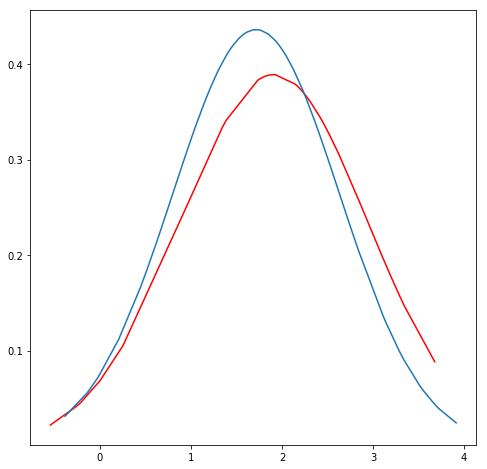

In [107]:
fig, ax = plt.subplots(figsize=(8,8))
x = list(c_2['ln'])
x1 = list(c_1['ln'])
loc = np.mean(x)
scale = np.std(x)
loc1 = np.mean(x1)
scale1 = np.std(x1)
ax.plot(x,  norm.pdf(x, loc, scale), color='r')
ax.plot(x1,  norm.pdf(x1, loc1, scale1))
plt.show()

In [21]:
# get the df:
def city(df, x):
    a = df[df.city == x].copy()
    return a
# group by piece per m (total)
def group_pcs_m(df):
    a = df.groupby(['date', 'location_id'])[['pcs_per_m']].sum()
    return a
# graph the city surveys
def graph_city_surveys(df):
    plt.figure(figsize=(12,5));
    df.plot()
    plt.show()
# get the top ten surveys
def top_ten_surveys(df, n=10, column='pcs_per_m'):
    a = df.sort_values(by=column)[-n:]
    return a
#graph the top ten
def graph_top(df):
    plt.figure(figsize=(12,5));
    df.plot.bar()
    plt.show()
# make a pivot table
def make_pivot(df):
    a = df.pivot_table(['pcs_per_m'], index=['date', 'post', 'water', 'location_id'], columns=['code_id'])
    return a
# get the grouping data
def use_pickle(file):
    a = pickle.load(open(file, 'rb'))
# make grouping dict
def code_desc(x):
    a, c, f = {}, {}, {}
    for i in x:
        b = {i['code']:i['description']}
        d = {i['code']:i['material']}
        e = {i['code']:i['source']}
        a.update(b)
        c.update(d)
        f.update(e)
    return a, c, f
dfZQ = z_pivot_q.groupby(sources, level='code_id', axis=1).sum()
# use code_desc to group pivot table as sources or material
def make_a_group(pivot_table, group):
    a = pivot_table.groupby(group, level='code_id', axis=1).sum()
    return a
# get the index values you need
def get_index_names(df, level):
    a = df.index.get_level_values(level).unique()
    return a

NameError: name 'z_pivot_q' is not defined